## Imports necesarios

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot, pylab
import os
from helper import *
from tester import *

## Compilar binario

In [2]:
!make

g++ ./src/tp1.cpp -o ./tp1 -O3


## Correr tests de la catedra (descomentar)

In [3]:
## Chequear método diff de helper.py.
## Esto verifica que nuestra soluciones no tengan una distancia mayor a 
## 1e-4 de las que nos dieron.
# run_each()

## Funciones que crean tests (descomentar)

In [4]:
## Crear carpeta de tests
# !mkdir -p ./our_tests
## Tests ralos
# sparse_tests_extra_links()
## Test de grafo denso
#dense_test()
## Crear carpetas para los distintos valores de p:
# !bash && cd our_tests && for i in 0.3 0.5 0.7 0.9; do mkdir -p "${i}" && cp ./*.txt "${i}"; done

## Ejecutar tests (descomentar)

In [5]:
## Este tarda....
#run_our_tests() 

## CSV con los resultados de los tests bajo /our_tests

In [6]:
results = pd.read_csv('./results.csv')
results

,n,m,sparsiness,number,p,time,name
0,1000,45000,97,4,0.3,7.866825,sparseextra
1,100,1600,99,2,0.3,0.023069,sparseextra
2,200,2000,95,1,0.3,0.090734,sparse
3,50,875,95,0,0.3,0.008572,sparseextra
4,1000,10000,99,3,0.3,2.484072,sparse
...,...,...,...,...,...,...,...
795,100,1800,97,1,0.9,0.039148,sparseextra
796,200,1200,97,0,0.9,0.096532,sparse
797,1000,30000,97,3,0.9,11.054309,sparse
798,300,9000,95,1,0.9,0.772408,sparseextra


## Código para comprobar nuestra hipótesis de los 15 primeros

In [7]:
rankings = read_test_out(f"./our_tests/0.9/1000_99_1_sparse.txt.out")
df_sparse = pd.DataFrame(rankings, columns = ["x_i", "Rank"])
first_15 = [True if x < 15 else False for x in range(1000)]
df_sparse["Primeros 15"] = first_15
df_sparse

,x_i,Rank,Primeros 15
0,1,0.000640,True
1,2,0.001120,True
2,3,0.000872,True
3,4,0.001109,True
4,5,0.001661,True
...,...,...,...
995,996,0.000667,False
996,997,0.000765,False
997,998,0.001111,False
998,999,0.001102,False


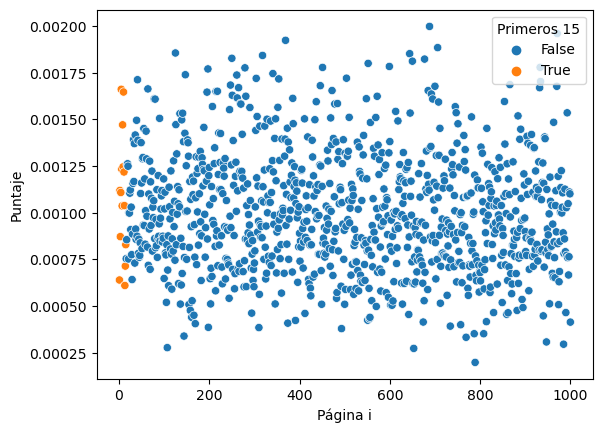

In [8]:
uniform_plot = sb.scatterplot(df_sparse, x="x_i", y="Rank", hue="Primeros 15") 
uniform_plot.set(xlabel="Página i", ylabel="Puntaje")
matplotlib.pyplot.savefig('n_1000_ranking.svg')

In [9]:
rankings = read_test_out(f"./our_tests/0.9/1000_99_1_sparseextra.txt.out")
df_extra = pd.DataFrame(rankings, columns = ["x_i", "Rank"])
first_15 = [True if x < 15 else False for x in range(1000)]
df_extra["Primeros 15"] = first_15
df_extra

,x_i,Rank,Primeros 15
0,1,0.000666,True
1,2,0.001117,True
2,3,0.000794,True
3,4,0.001119,True
4,5,0.001566,True
...,...,...,...
995,996,0.000674,False
996,997,0.000781,False
997,998,0.001102,False
998,999,0.001125,False


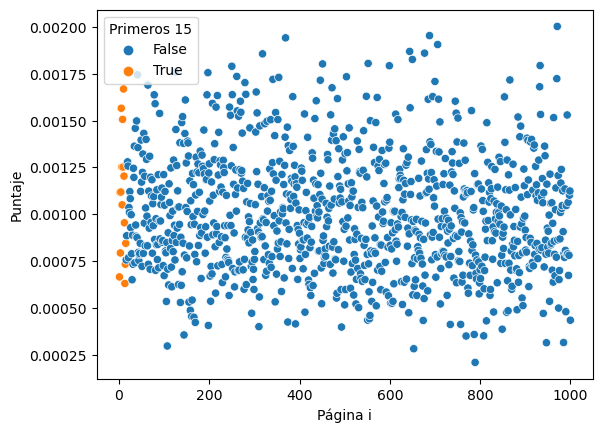

In [10]:
uniform_plot = sb.scatterplot(df_extra, x="x_i", y="Rank", hue="Primeros 15") 
uniform_plot.set(xlabel="Página i", ylabel="Puntaje")
matplotlib.pyplot.savefig('n_1000_ranking_extra.svg')

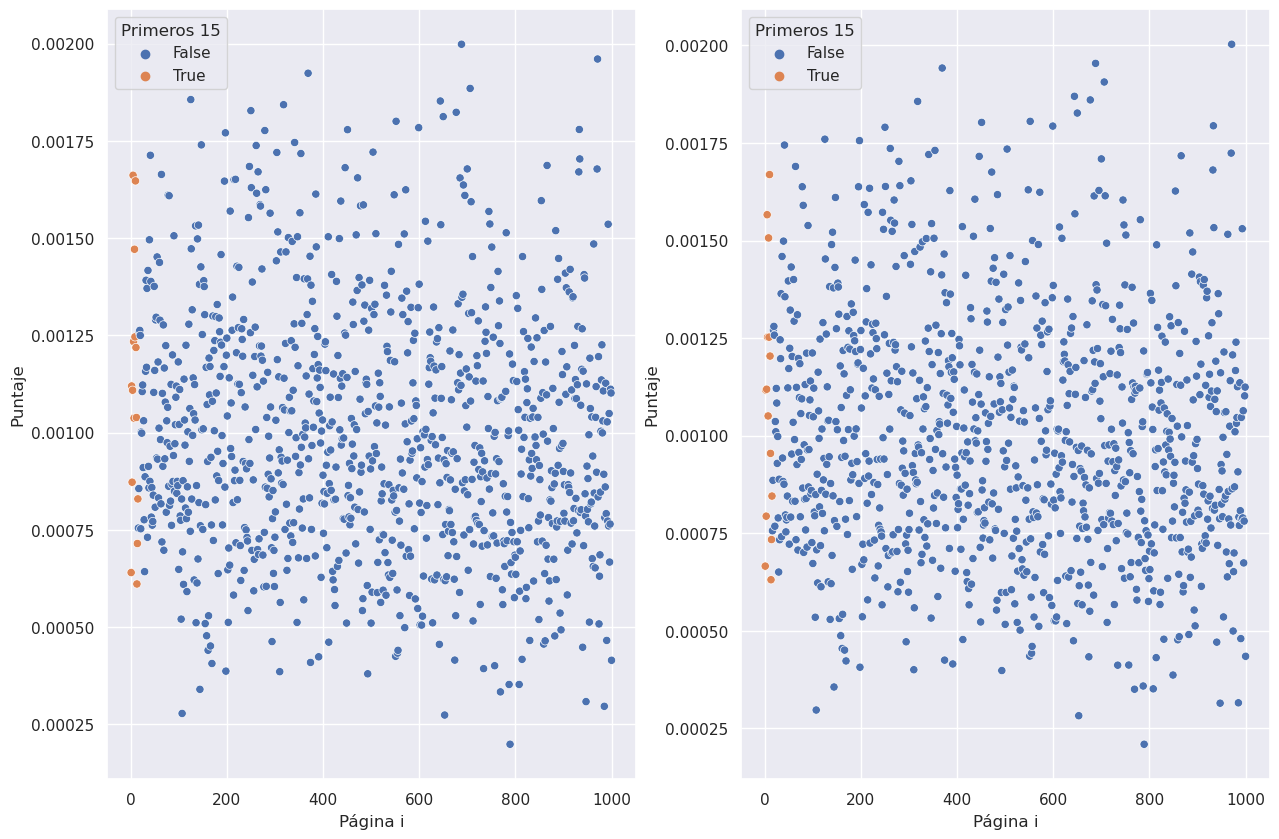

In [11]:
sb.set_theme()
fig, axes = matplotlib.pyplot.subplots(1, 2, figsize=(15,10))
left = sb.scatterplot(df_sparse, x="x_i", y="Rank", ax=axes[0], hue="Primeros 15") 
left.set(xlabel="Página i", ylabel="Puntaje")
right = sb.scatterplot(df_extra, x="x_i", y="Rank", ax=axes[1], hue="Primeros 15")
right.set(xlabel="Página i", ylabel="Puntaje")
matplotlib.pyplot.savefig('comparing_sparse_and_sparsextra.svg')

In [12]:
rankings = read_test_out(f"./our_tests/0.9/300_97_2_sparse.txt.out")
df_300_sparse = pd.DataFrame(rankings, columns = ["x_i", "Rank"])
df_300_sparse

,x_i,Rank
0,1,0.001800
1,2,0.003235
2,3,0.003965
3,4,0.003131
4,5,0.004934
...,...,...
295,296,0.004993
296,297,0.004721
297,298,0.003946
298,299,0.004056


In [13]:
rankings = read_test_out(f"./our_tests/0.9/300_50_2_density.txt.out")
df_300_dense = pd.DataFrame(rankings, columns = ["x_i", "Rank"])
df_300_dense

,x_i,Rank
0,1,0.003985
1,2,0.003797
2,3,0.004190
3,4,0.003952
4,5,0.003762
...,...,...
295,296,0.003154
296,297,0.003091
297,298,0.003204
298,299,0.003385


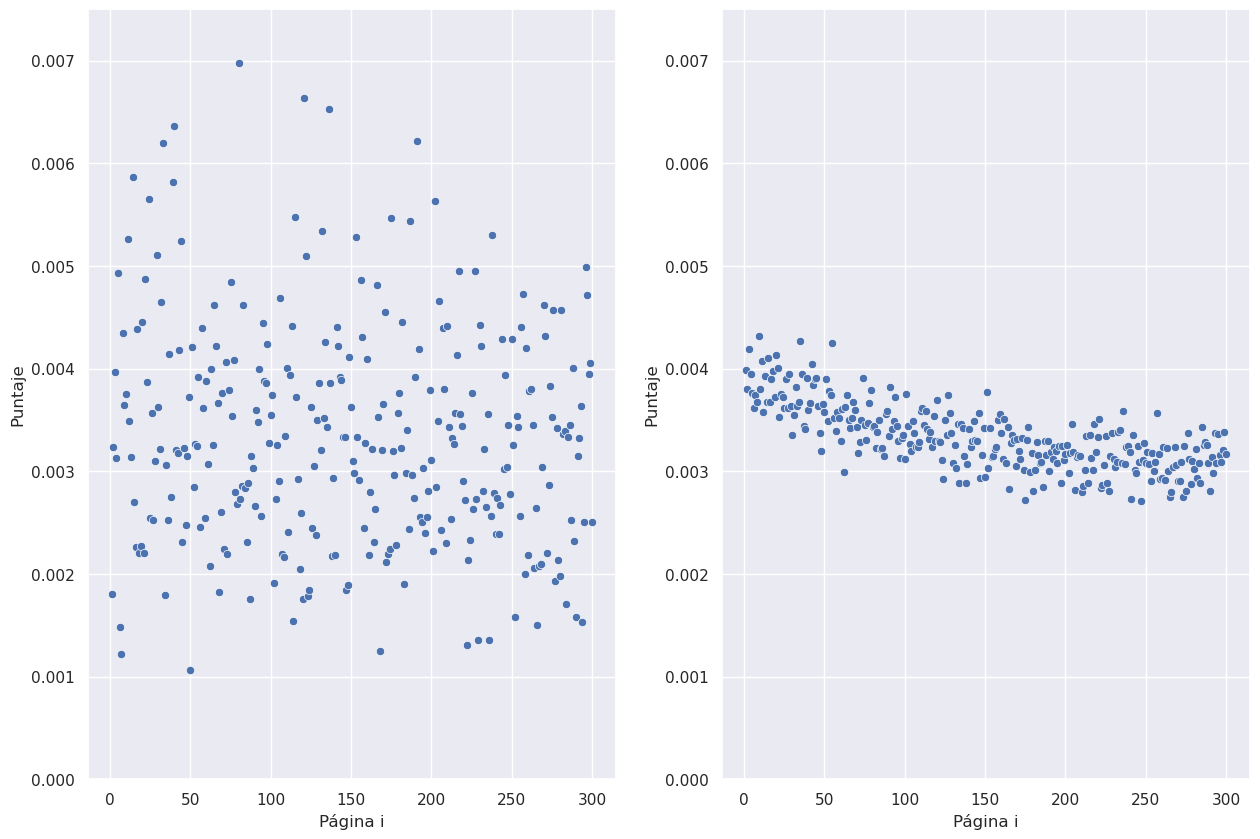

In [14]:
sb.set_theme()
fig, axes = matplotlib.pyplot.subplots(1, 2, figsize=(15,10))
axes[1].set_ylim((0.0, 0.0075))
left = sb.scatterplot(df_300_sparse, x="x_i", y="Rank", ax=axes[0]) 
left.set(xlabel="Página i", ylabel="Puntaje")
axes[0].set_ylim((0.0, 0.0075))
right = sb.scatterplot(df_300_dense, x="x_i", y="Rank", ax=axes[1])
right.set(xlabel="Página i", ylabel="Puntaje")
matplotlib.pyplot.savefig('comparing_sparse_and_dense.svg')

In [15]:
sb.scatterplot(df, x="x_i", y="Rank")

NameError: name 'df' is not defined

In [ ]:
benchmark_show_varying_p = results[["n", "time", "name", "p"]][results.name == "sparse"]
benchmark_show_varying_p

In [ ]:
fig, axes = matplotlib.pyplot.subplots(2, 2, figsize=(15,10))
upper_left = sb.lineplot(results[results.p == 0.3], x="n", y="time", ax=axes[0][0], hue="p", palette=["y"]) 
upper_left.set(xlabel="Cantidad de Páginas", ylabel="Tiempo en segundos")

upper_right = sb.lineplot(results[results.p == 0.5], x="n", y="time", ax=axes[0][1], hue="p", palette=["g"]) 
upper_right.set(xlabel="Cantidad de Páginas", ylabel="Tiempo en segundos")

lower_left = sb.lineplot(results[results.p == 0.7], x="n", y="time", ax=axes[1][0], hue="p", palette=["b"]) 
lower_left.set(xlabel="Cantidad de Páginas", ylabel="Tiempo en segundos")

lower_right = sb.lineplot(results[results.p == 0.9], x="n", y="time", ax=axes[1][1], hue="p", palette=["r"]) 
lower_right.set(xlabel="Cantidad de Páginas", ylabel="Tiempo en segundos")

for (x, y) in [(0,0), (0, 1), (1, 0), (1,1)]:
    axes[x][y].set_ylim((0, 16))

In [ ]:
plot = sb.lineplot(benchmark_show_varying_p, x="n", y="time", hue="p", palette=['y', 'g', 'b', 'r'])
plot.set(xlabel="Número de páginas", ylabel="Tiempo en segundos")
matplotlib.pyplot.savefig('benchmark_show_varying_p.svg')

## Tests de P

In [ ]:
def get_data_frames_for_p_test(n):
    dataframes = []
    for p in [0.3, 0.5, 0.7, 0.9]:
        out = read_test_out(f"./our_tests/{str(p)}/{str(n)}_97_3_sparse.txt.out")
        df = pd.DataFrame(out, columns = ["x_i", "Rank"])
        dataframes.append(df)
    return dataframes

### N = 1000

In [ ]:
dataframes_1000 = []
for p in [0.3, 0.5, 0.7, 0.9]:
    out = read_test_out(f"./our_tests/{str(p)}/1000_97_3_sparse.txt.out")
    df = pd.DataFrame(out, columns = ["x_i", "Rank"])
    dataframes_1000.append(df)

In [ ]:
dataframes_1000

In [ ]:
sb.set_theme()
fig, axes = matplotlib.pyplot.subplots(2, 2, figsize=(15,10))
upper_left = sb.scatterplot(dataframes_1000[0], x="x_i", y="Rank", ax=axes[0][0], label="p = 0.3") 
upper_left.set(xlabel="Página i", ylabel="Puntaje")

upper_right = sb.scatterplot(dataframes_1000[1], x="x_i", y="Rank", ax=axes[0][1], label="p = 0.5")
upper_right.set(xlabel="Página i", ylabel="Puntaje")

lower_left = sb.scatterplot(dataframes_1000[2], x="x_i", y="Rank", ax=axes[1][0], label="p = 0.7")
lower_left.set(xlabel="Página i", ylabel="Puntaje")

lower_right = sb.scatterplot(dataframes_1000[3], x="x_i", y="Rank", ax=axes[1][1], label="p = 0.9")
lower_right.set(xlabel="Página i", ylabel="Puntaje")

for (x, y) in [(0,0), (0, 1), (1, 0), (1,1)]:
    axes[x][y].set_ylim((0.0, 0.0016))
matplotlib.pyplot.savefig('compare_p_with_n_1000.svg')

## N = 300

In [ ]:
df_300_p = get_data_frames_for_p_test(300)
sb.set_theme()
fig, axes = matplotlib.pyplot.subplots(2, 2, figsize=(15,10))
upper_left = sb.scatterplot(df_300_p[0], x="x_i", y="Rank", ax=axes[0][0], label="p = 0.3") 
upper_left.set(xlabel="Página i", ylabel="Puntaje")

upper_right = sb.scatterplot(df_300_p[1], x="x_i", y="Rank", ax=axes[0][1], label="p = 0.5")
upper_right.set(xlabel="Página i", ylabel="Puntaje")

lower_left = sb.scatterplot(df_300_p[2], x="x_i", y="Rank", ax=axes[1][0], label="p = 0.7")
lower_left.set(xlabel="Página i", ylabel="Puntaje")

lower_right = sb.scatterplot(df_300_p[3], x="x_i", y="Rank", ax=axes[1][1], label="p = 0.9")
lower_right.set(xlabel="Página i", ylabel="Puntaje")

for (x, y) in [(0,0), (0, 1), (1, 0), (1,1)]:
    axes[x][y].set_ylim((0.0, 0.007))
matplotlib.pyplot.savefig('compare_p_with_n_300.svg')

## Test cuantitativo

### Test 15 segundos:

In [ ]:
## Obtengo archivo de tests
import os
test_file_our = os.getcwd() + f"/tests/test_15_segundos.txt"
test_file_original = os.getcwd() + f"/tests_catedra_original/test_15_segundos.txt"
test_15_segundos = read_test(test_file_our, test_file_original)

In [ ]:
## Queremos ver |Ax'-x'| cerca de 0
# Lo comento porque ya lo tengo
# test_15_segundos.solve_with_cpp(0.9)
diff_with_test =  test_15_segundos.diff_solution_with_A_times_x()


In [ ]:
print(diff_with_test)

In [ ]:
df_diff_15 = pd.DataFrame([(indx, diff) for (indx, diff) in enumerate(diff_with_test)])
df_diff_15

In [ ]:
fig = sb.scatterplot(df_diff_15, x=0, y=1)
fig.set(xlabel="Página i", ylabel="$|Ax'-x'|$")
#fig = sb.lineplot(x=range(2000), y=1e-4)

## Test 30 segundos

In [ ]:
## Obtengo archivo de tests
import os
test_file_ours = os.getcwd() + f"/our_tests/0.9/1000_99_1_sparse.txt"
# test_file_original = os.getcwd() + f"/tests_catedra_original/test_30_segundos.txt"
test_1000 = read_test(test_file_ours, test_file_ours + ".out")

In [ ]:
diff_with_test =  test_1000.diff_solution_with_A_times_x()

In [ ]:
df_diff_1000 = pd.DataFrame([(indx, diff) for (indx, diff) in enumerate(diff_with_test)])
df_diff_1000

In [ ]:
fig = sb.scatterplot(df_diff_1000, x=0, y=1)
fig.set(xlabel="Página i", ylabel="$|Ax'-x'|$")
#fig = sb.lineplot(x=range(1000), y=1e-4)
#fig.set_ylim((0.0, 1e-2))
#matplotlib.pyplot.xscale("log")

## Test Error Absoluto

In [ ]:
import os
tests_path = os.getcwd() + "/tests_catedra_original"
files = os.listdir(tests_path)
files.remove('tp1.pdf')
files.remove('README.txt')
files = [file for file in files if file.endswith(".txt")]
tests = []
for file in files:
    test = read_test("./tests/" + file, "./tests_catedra_original/" + file)
    tests.append(test)

In [ ]:
dataframes = []
for file in tests:
    print(file.test_path)
for i in range(len(tests)):
    df_tests_error = pd.DataFrame()
    p, our_solution = tests[i].solution_file()
    p, original_solution = tests[i].solution_file_original()
    name = tests[i].test_path.split('/')[-1]
    indices = [x for x in range(len(original_solution))]
    error = [abs(our_solution[x]-original_solution[x]) for x in range(len(original_solution))]
    df_tests_error["Error absoluto"] = error
    df_tests_error["Página i"] = indices
    df_tests_error["name"] = name
    dataframes.append(df_tests_error)


In [ ]:
df_sin_links = dataframes[0]
df_15_segundos = dataframes[1]
df_30_segundos = dataframes[2]
df_aleatorio = dataframes[3]
df_desordenado = dataframes[4]
df_trivial = dataframes[5]
df_completo = dataframes[6]

In [ ]:
fig = sb.lineplot(x=range(3000), y=1e-4, color="r", label="Limite aceptado: 1e-4")
fig = sb.scatterplot(df_15_segundos, x="Página i", y="Error absoluto", label= "Test de 15 segundos")
fig = sb.scatterplot(df_30_segundos, x="Página i", y="Error absoluto", label= "Test de 30 segundos")
matplotlib.pyplot.savefig("15_30_secs_error.svg")

In [ ]:
df_sin_links = dataframes[0]
df_15_segundos = dataframes[1]
df_30_segundos = dataframes[2]
df_aleatorio = dataframes[3]
df_desordenado = dataframes[4]
df_trivial = dataframes[5]
df_completo = dataframes[6]


fig = sb.lineplot(x=range(5),y=1e-4, color="r", label="Limite aceptado: 1e-4")
fig = sb.scatterplot(df_sin_links, x="Página i", y="Error absoluto", label= "Sin links")
fig = sb.scatterplot(df_aleatorio, x="Página i", y="Error absoluto", label= "Aleatorio")
fig = sb.scatterplot(df_trivial, x="Página i", y="Error absoluto", label= "Trivial")
fig = sb.scatterplot(df_completo, x="Página i", y="Error absoluto", label= "Completo")
fig = sb.scatterplot(df_desordenado, x="Página i", y="Error absoluto", label="Desordenado")

matplotlib.pyplot.savefig("error_absoluto.svg")